In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.colors import LogNorm
import urllib.request
import os 

#############################
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

2024-03-15 12:05:50.356480: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
zeroFile = 'data/train/jetImage_0_100p_0_10000.h5'
firstFile = 'data/train/jetImage_1_100p_0_10000.h5'
secondFile = 'data/train/jetImage_2_100p_0_10000.h5'
thirdFile = 'data/train/jetImage_3_100p_0_10000.h5'
fourthFile = 'data/train/jetImage_4_100p_0_10000.h5'

    
if not os.path.isfile(zeroFile):
    if not os.path.isdir('data/train'):
        os.makedirs('data/train')
   
    urllib.request.urlretrieve('http://www.hep.ucl.ac.uk/undergrad/0056/other/projects/jetimage/'+zeroFile, zeroFile)


if not os.path.isfile(firstFile):
    if not os.path.isdir('data/train'):
        os.makedirs('data/train')
   
    urllib.request.urlretrieve('http://www.hep.ucl.ac.uk/undergrad/0056/other/projects/jetimage/'+firstFile, firstFile)

    
if not os.path.isfile(secondFile):
    if not os.path.isdir('data/train'):
        os.makedirs('data/train')
   
    urllib.request.urlretrieve('http://www.hep.ucl.ac.uk/undergrad/0056/other/projects/jetimage/'+secondFile, secondFile)


if not os.path.isfile(thirdFile):
    if not os.path.isdir('data/train'):
        os.makedirs('data/train')
   
    urllib.request.urlretrieve('http://www.hep.ucl.ac.uk/undergrad/0056/other/projects/jetimage/'+thirdFile, thirdFile)


if not os.path.isfile(fourthFile):
    if not os.path.isdir('data/train'):
        os.makedirs('data/train')
   
    urllib.request.urlretrieve('http://www.hep.ucl.ac.uk/undergrad/0056/other/projects/jetimage/'+fourthFile, fourthFile)


df=h5py.File(zeroFile,'r')
df1=h5py.File(firstFile,'r')
df2=h5py.File(secondFile,'r')
df3=h5py.File(thirdFile,'r')
df4=h5py.File(fourthFile,'r')

#############################################

data1_zero = np.array(df.get('jetConstituentList'))
data1_first = np.array(df1.get('jetConstituentList'))
data1_second = np.array(df2.get('jetConstituentList'))
data1_third = np.array(df3.get('jetConstituentList'))
data1_fourth = np.array(df4.get('jetConstituentList'))

data3_zero = np.array(df.get('jetImage'))  
data3_first = np.array(df1.get('jetImage')) 
data3_second = np.array(df2.get('jetImage')) 
data3_third = np.array(df3.get('jetImage')) 
data3_fourth = np.array(df4.get('jetImage')) 

data4_zero = np.array(df.get('jetImageECAL'))  
data4_first = np.array(df1.get('jetImageECAL'))
data4_second = np.array(df2.get('jetImageECAL'))
data4_third = np.array(df3.get('jetImageECAL'))
data4_fourth = np.array(df4.get('jetImageECAL'))

data5_zero = np.array(df.get('jetImageHCAL'))  
data5_first = np.array(df1.get('jetImageHCAL'))  
data5_second = np.array(df2.get('jetImageHCAL'))  
data5_third = np.array(df3.get('jetImageHCAL'))  
data5_fourth = np.array(df4.get('jetImageHCAL'))  

data6_zero = np.array(df.get('jets')) 
data6_first = np.array(df1.get('jets')) 
data6_second = np.array(df2.get('jets')) 
data6_third = np.array(df3.get('jets')) 
data6_fourth = np.array(df4.get('jets')) 

In [3]:
# Concatenate datasets along the first axis
jetConstituentList = np.concatenate((data1_zero, data1_first, data1_second, data1_third, data1_fourth), axis=0)

jetImage = np.concatenate((data3_zero, data3_first, data3_second, data3_third, data3_fourth), axis=0)
jetImageECAL = np.concatenate((data4_zero, data4_first, data4_second, data4_third, data4_fourth), axis=0)
jetImageHCAL = np.concatenate((data5_zero, data5_first, data5_second, data5_third, data5_fourth), axis=0)

jets = np.concatenate((data6_zero, data6_first, data6_second, data6_third, data6_fourth), axis=0)


# Print the shape of the combined data
print(df.keys())


<KeysViewHDF5 ['jetConstituentList', 'jetFeatureNames', 'jetImage', 'jetImageECAL', 'jetImageHCAL', 'jets', 'particleFeatureNames']>


In [4]:
print(df['jetFeatureNames'][:])

[b'j_ptfrac' b'j_pt' b'j_eta' b'j_mass' b'j_tau1_b1' b'j_tau2_b1'
 b'j_tau3_b1' b'j_tau1_b2' b'j_tau2_b2' b'j_tau3_b2' b'j_tau32_b1'
 b'j_tau32_b2' b'j_zlogz' b'j_c1_b0' b'j_c1_b1' b'j_c1_b2' b'j_c2_b1'
 b'j_c2_b2' b'j_d2_b1' b'j_d2_b2' b'j_d2_a1_b1' b'j_d2_a1_b2' b'j_m2_b1'
 b'j_m2_b2' b'j_n2_b1' b'j_n2_b2' b'j_tau1_b1_mmdt' b'j_tau2_b1_mmdt'
 b'j_tau3_b1_mmdt' b'j_tau1_b2_mmdt' b'j_tau2_b2_mmdt' b'j_tau3_b2_mmdt'
 b'j_tau32_b1_mmdt' b'j_tau32_b2_mmdt' b'j_c1_b0_mmdt' b'j_c1_b1_mmdt'
 b'j_c1_b2_mmdt' b'j_c2_b1_mmdt' b'j_c2_b2_mmdt' b'j_d2_b1_mmdt'
 b'j_d2_b2_mmdt' b'j_d2_a1_b1_mmdt' b'j_d2_a1_b2_mmdt' b'j_m2_b1_mmdt'
 b'j_m2_b2_mmdt' b'j_n2_b1_mmdt' b'j_n2_b2_mmdt' b'j_mass_trim'
 b'j_mass_mmdt' b'j_mass_prun' b'j_mass_sdb2' b'j_mass_sdm1'
 b'j_multiplicity' b'j_g' b'j_q' b'j_w' b'j_z' b'j_t' b'j_undef']


In [5]:
print(df['jetFeatureNames'][1])
print(df['jetFeatureNames'][2])
print(df['jetFeatureNames'][3])
print("")
print(df['jetFeatureNames'][27:34])
print(df['jetFeatureNames'][34:39])
print(df['jetFeatureNames'][48])
print(df['jetFeatureNames'][-7])
print("")
print(df['jetFeatureNames'][-6])
print(df['jetFeatureNames'][-5])
print(df['jetFeatureNames'][-4])
print(df['jetFeatureNames'][-3])
print(df['jetFeatureNames'][-2])

b'j_pt'
b'j_eta'
b'j_mass'

[b'j_tau2_b1_mmdt' b'j_tau3_b1_mmdt' b'j_tau1_b2_mmdt' b'j_tau2_b2_mmdt'
 b'j_tau3_b2_mmdt' b'j_tau32_b1_mmdt' b'j_tau32_b2_mmdt']
[b'j_c1_b0_mmdt' b'j_c1_b1_mmdt' b'j_c1_b2_mmdt' b'j_c2_b1_mmdt'
 b'j_c2_b2_mmdt']
b'j_mass_mmdt'
b'j_multiplicity'

b'j_g'
b'j_q'
b'j_w'
b'j_z'
b'j_t'


In [6]:
# dataset with jet features 

data_g = jets[jets[:,-6]==1]
data_q = jets[jets[:,-5]==1]
data_W = jets[jets[:,-4]==1]
data_Z = jets[jets[:,-3]==1]
data_t = jets[jets[:,-2]==1]

### selecting relevant features
data_q = data_q[:,[1, 2, 3, 27, 34, 48, -7, -6, -5, -4, -3, -2]]
data_g = data_g[:,[1, 2, 3, 27, 34, 48, -7, -6, -5, -4, -3, -2]]
data_W = data_W[:,[1, 2, 3, 27, 34, 48, -7, -6, -5, -4, -3, -2]]
data_Z = data_Z[:,[1, 2, 3, 27, 34, 48, -7, -6, -5, -4, -3, -2]]
data_t = data_t[:,[1, 2, 3, 27, 34, 48, -7, -6, -5, -4, -3, -2]]

#1 b'j_pt' --> 
#2 b'j_eta' -->
#3 b'j_mass' -->
#27 b'j_tau1_b1' -->
#34 b'j_c1_b0_mmdt' -->
#48 b'j_mass_mmdt' -->
#-7 b'j_multiplicity' -->
#-6 b'j_g' -->
#-5 b'j_q' -->
#-4 b'j_w' -->
#-3 b'j_z' -->
#-2 b'j_t' -->

print(f"Jets shape:",jets.shape)
print(data_q.shape, data_g.shape, data_W.shape, data_Z.shape, data_t.shape)

print("")
print('----------------------------------------------------------------')
print("")


minNumberdata = min(data_q.shape[0],data_g.shape[0],data_W.shape[0],
                data_Z.shape[0],data_t.shape[0])


print(f"Minimum number of Data",minNumberdata) # making equal number of data 

print("")
print('----------------------------------------------------------------')
print("")

data_q = data_q[:minNumberdata]
data_g = data_g[:minNumberdata]
data_W = data_W[:minNumberdata]
data_Z = data_Z[:minNumberdata]
data_t = data_t[:minNumberdata]


print(f"Quark features Reshaped :",data_q.shape)
print(f"Gluon features Reshaped :",data_g.shape)
print(f"W features Reshaped :",data_W.shape)
print(f"Z features Reshaped :",data_Z.shape)
print(f"Top features Reshaped :",data_t.shape)


print("")
print('---------------- One Hot Particle Encoding -------------------------')
print("")

print(f" Gluon: {jets[:,-6]}")
print(f" Quark: {jets[:,-5]}")
print(f" W boson: {jets[:,-4]}")
print(f" Z boson: {jets[:,-3]}")
print(f" Top: {jets[:,-2]}")

print("")
print('----------------------------------------------------------------')
print(data_q[:,2].shape)

Jets shape: (50000, 59)
(9643, 12) (10273, 12) (10118, 12) (9771, 12) (10195, 12)

----------------------------------------------------------------

Minimum number of Data 9643

----------------------------------------------------------------

Quark features Reshaped : (9643, 12)
Gluon features Reshaped : (9643, 12)
W features Reshaped : (9643, 12)
Z features Reshaped : (9643, 12)
Top features Reshaped : (9643, 12)

---------------- One Hot Particle Encoding -------------------------

 Gluon: [1. 0. 0. ... 0. 0. 0.]
 Quark: [0. 0. 0. ... 0. 1. 0.]
 W boson: [0. 1. 0. ... 0. 0. 0.]
 Z boson: [0. 0. 0. ... 0. 0. 0.]
 Top: [0. 0. 1. ... 1. 0. 1.]

----------------------------------------------------------------
(9643,)


In [7]:
# All particle features stated, but is not required to use

print("")
print('----------------------------------------------------------------')
print("")

list_q = jetConstituentList[jets[:,-6]==1]
list_g = jetConstituentList[jets[:,-5]==1]
list_W = jetConstituentList[jets[:,-4]==1]
list_Z = jetConstituentList[jets[:,-3]==1]
list_t = jetConstituentList[jets[:,-2]==1]


print(f"Quark List:",list_q.shape)
print(f"Gluon List  :",list_g.shape)
print(f"W List  :",list_W.shape)
print(f"Z List :",list_Z.shape)
print(f"Top List  :",list_t.shape)
print("")
print('----------------------------------------------------------------')
print("")

minEntries = min(list_q.shape[0],list_g.shape[0],list_W.shape[0],
                list_Z.shape[0],list_t.shape[0])

print(f'Minimum Value of Lists:',minEntries)
print("")
print('----------------------------------------------------------------')
print("")
list_q = list_q[:minEntries,:,:]
list_g = list_g[:minEntries,:,:]
list_W = list_W[:minEntries,:,:]
list_Z = list_Z[:minEntries,:,:]
list_t = list_t[:minEntries,:,:]


print(f"Quark particle fetaures Reshaped :",list_q.shape)
print(f"Gluon particle fetaures Reshaped :",list_g.shape)
print(f"W particle fetaures Reshaped :",list_W.shape)
print(f"Z particle fetaures Reshaped :",list_Z.shape)
print(f"Top particle fetaures Reshaped :",list_t.shape)

print("")
print('----------------------------------------------------------------')
print("")


----------------------------------------------------------------

Quark List: (10273, 100, 16)
Gluon List  : (9643, 100, 16)
W List  : (10118, 100, 16)
Z List : (9771, 100, 16)
Top List  : (10195, 100, 16)

----------------------------------------------------------------

Minimum Value of Lists: 9643

----------------------------------------------------------------

Quark particle fetaures Reshaped : (9643, 100, 16)
Gluon particle fetaures Reshaped : (9643, 100, 16)
W particle fetaures Reshaped : (9643, 100, 16)
Z particle fetaures Reshaped : (9643, 100, 16)
Top particle fetaures Reshaped : (9643, 100, 16)

----------------------------------------------------------------



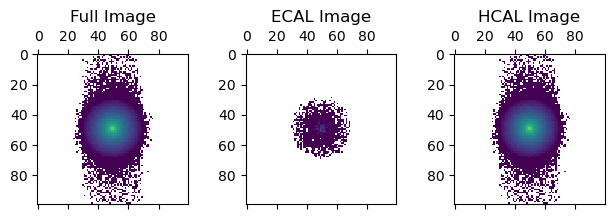

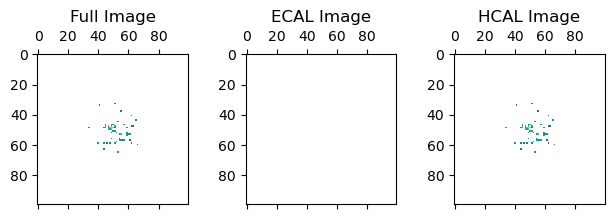

In [23]:
# Detector Plots

fig, ax = plt.subplots(1,3)
plt.tight_layout()
plt.subplots_adjust(top=1.2)
ax[0].matshow(np.mean(jetImage,axis=0),norm=LogNorm(vmin=0.01, vmax=1e3))
ax[0].set_title("Full Image")
ax[1].matshow(np.mean(jetImageECAL,axis=0),norm=LogNorm(vmin=0.01, vmax=1e3))
ax[1].set_title("ECAL Image")
ax[2].matshow(np.mean(jetImageHCAL,axis=0),norm=LogNorm(vmin=0.01, vmax=1e3))
ax[2].set_title("HCAL Image")
plt.savefig('detector_final_image.png')


fig, ax = plt.subplots(1,3)
plt.tight_layout()
plt.subplots_adjust(top=1.2)
ax[0].matshow(jetImage[0],norm=LogNorm(vmin=0.01, vmax=1e3))
ax[0].set_title("Full Image")
ax[1].matshow(jetImageECAL[0],norm=LogNorm(vmin=0.01, vmax=1e3))
ax[1].set_title("ECAL Image")
im3 = ax[2].matshow(jetImageHCAL[0],norm=LogNorm(vmin=0.01, vmax=1e3))
ax[2].set_title("HCAL Image")
plt.savefig('detector_example_final_image.png')

plt.show()

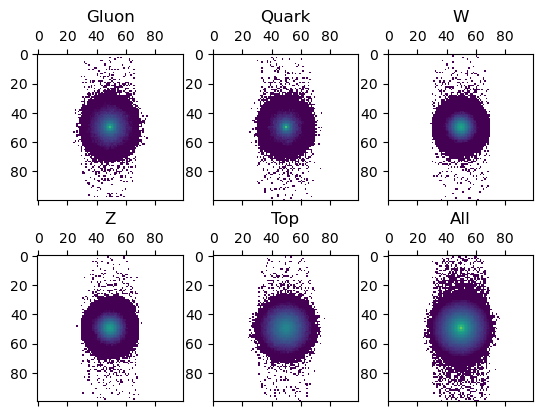

In [9]:
# Plotting Particles 

averageGluon=np.mean(jetImage*np.array(jets[:,-6])[:,None,None],axis=0)
averageQuark=np.mean(jetImage*np.array(jets[:,-5])[:,None,None],axis=0)
averageW=np.mean(jetImage*np.array(jets[:,-4])[:,None,None],axis=0)
averageZ=np.mean(jetImage*np.array(jets[:,-3])[:,None,None],axis=0)
averageT=np.mean(jetImage*np.array(jets[:,-2])[:,None,None],axis=0)
averageAll=np.mean(jetImage,axis=0)

fig, ax = plt.subplots(2,3)
ax[0][0].matshow(averageGluon,norm=LogNorm(vmin=0.01, vmax=1e3))
ax[0][0].set_title("Gluon")
ax[0][1].matshow(averageQuark,norm=LogNorm(vmin=0.01, vmax=1e3))
ax[0][1].set_title("Quark")
ax[0][2].matshow(averageW,norm=LogNorm(vmin=0.01, vmax=1e3))
ax[0][2].set_title("W")
ax[1][0].matshow(averageZ,norm=LogNorm(vmin=0.01, vmax=1e3))
ax[1][0].set_title("Z")
ax[1][1].matshow(averageT,norm=LogNorm(vmin=0.01, vmax=1e3))
ax[1][1].set_title("Top")
ax[1][2].matshow(averageAll,norm=LogNorm(vmin=0.01, vmax=1e3))
ax[1][2].set_title("All")

plt.savefig('Particle_average_image.png')

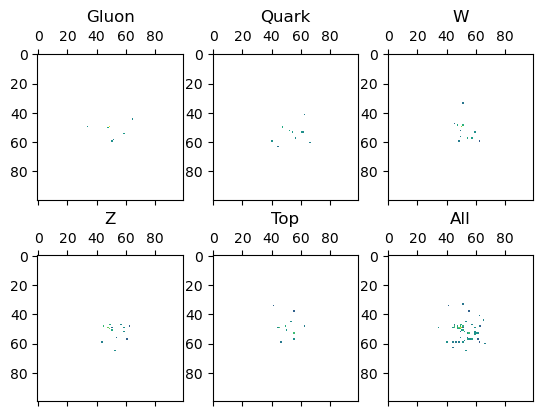

In [15]:
exampleAll = jetImage[0].reshape((100, 100))
exampleGluon = jetImage[0] * np.array(jets[:,-6])[:10000].reshape((100,100))
exampleQuark = jetImage[0] * np.array(jets[:,-5])[:10000].reshape((100,100))
exampleW = jetImage[0] * np.array(jets[:,-4])[:10000].reshape((100,100))
exampleZ = jetImage[0] * np.array(jets[:,-3])[:10000].reshape((100,100))
exampleT = jetImage[0] * np.array(jets[:,-2])[:10000].reshape((100,100))


fig, ax = plt.subplots(2,3)
ax[0][0].matshow(exampleGluon,norm=LogNorm(vmin=0.01, vmax=1e3))
ax[0][0].set_title("Gluon")
ax[0][1].matshow(exampleQuark,norm=LogNorm(vmin=0.01, vmax=1e3))
ax[0][1].set_title("Quark")
ax[0][2].matshow(exampleW,norm=LogNorm(vmin=0.01, vmax=1e3))
ax[0][2].set_title("W")
ax[1][0].matshow(exampleZ,norm=LogNorm(vmin=0.01, vmax=1e3))
ax[1][0].set_title("Z")
ax[1][1].matshow(exampleT,norm=LogNorm(vmin=0.01, vmax=1e3))
ax[1][1].set_title("Top")
ax[1][2].matshow(exampleAll,norm=LogNorm(vmin=0.01, vmax=1e3))
ax[1][2].set_title("All")

plt.savefig('particle_example_image.png')

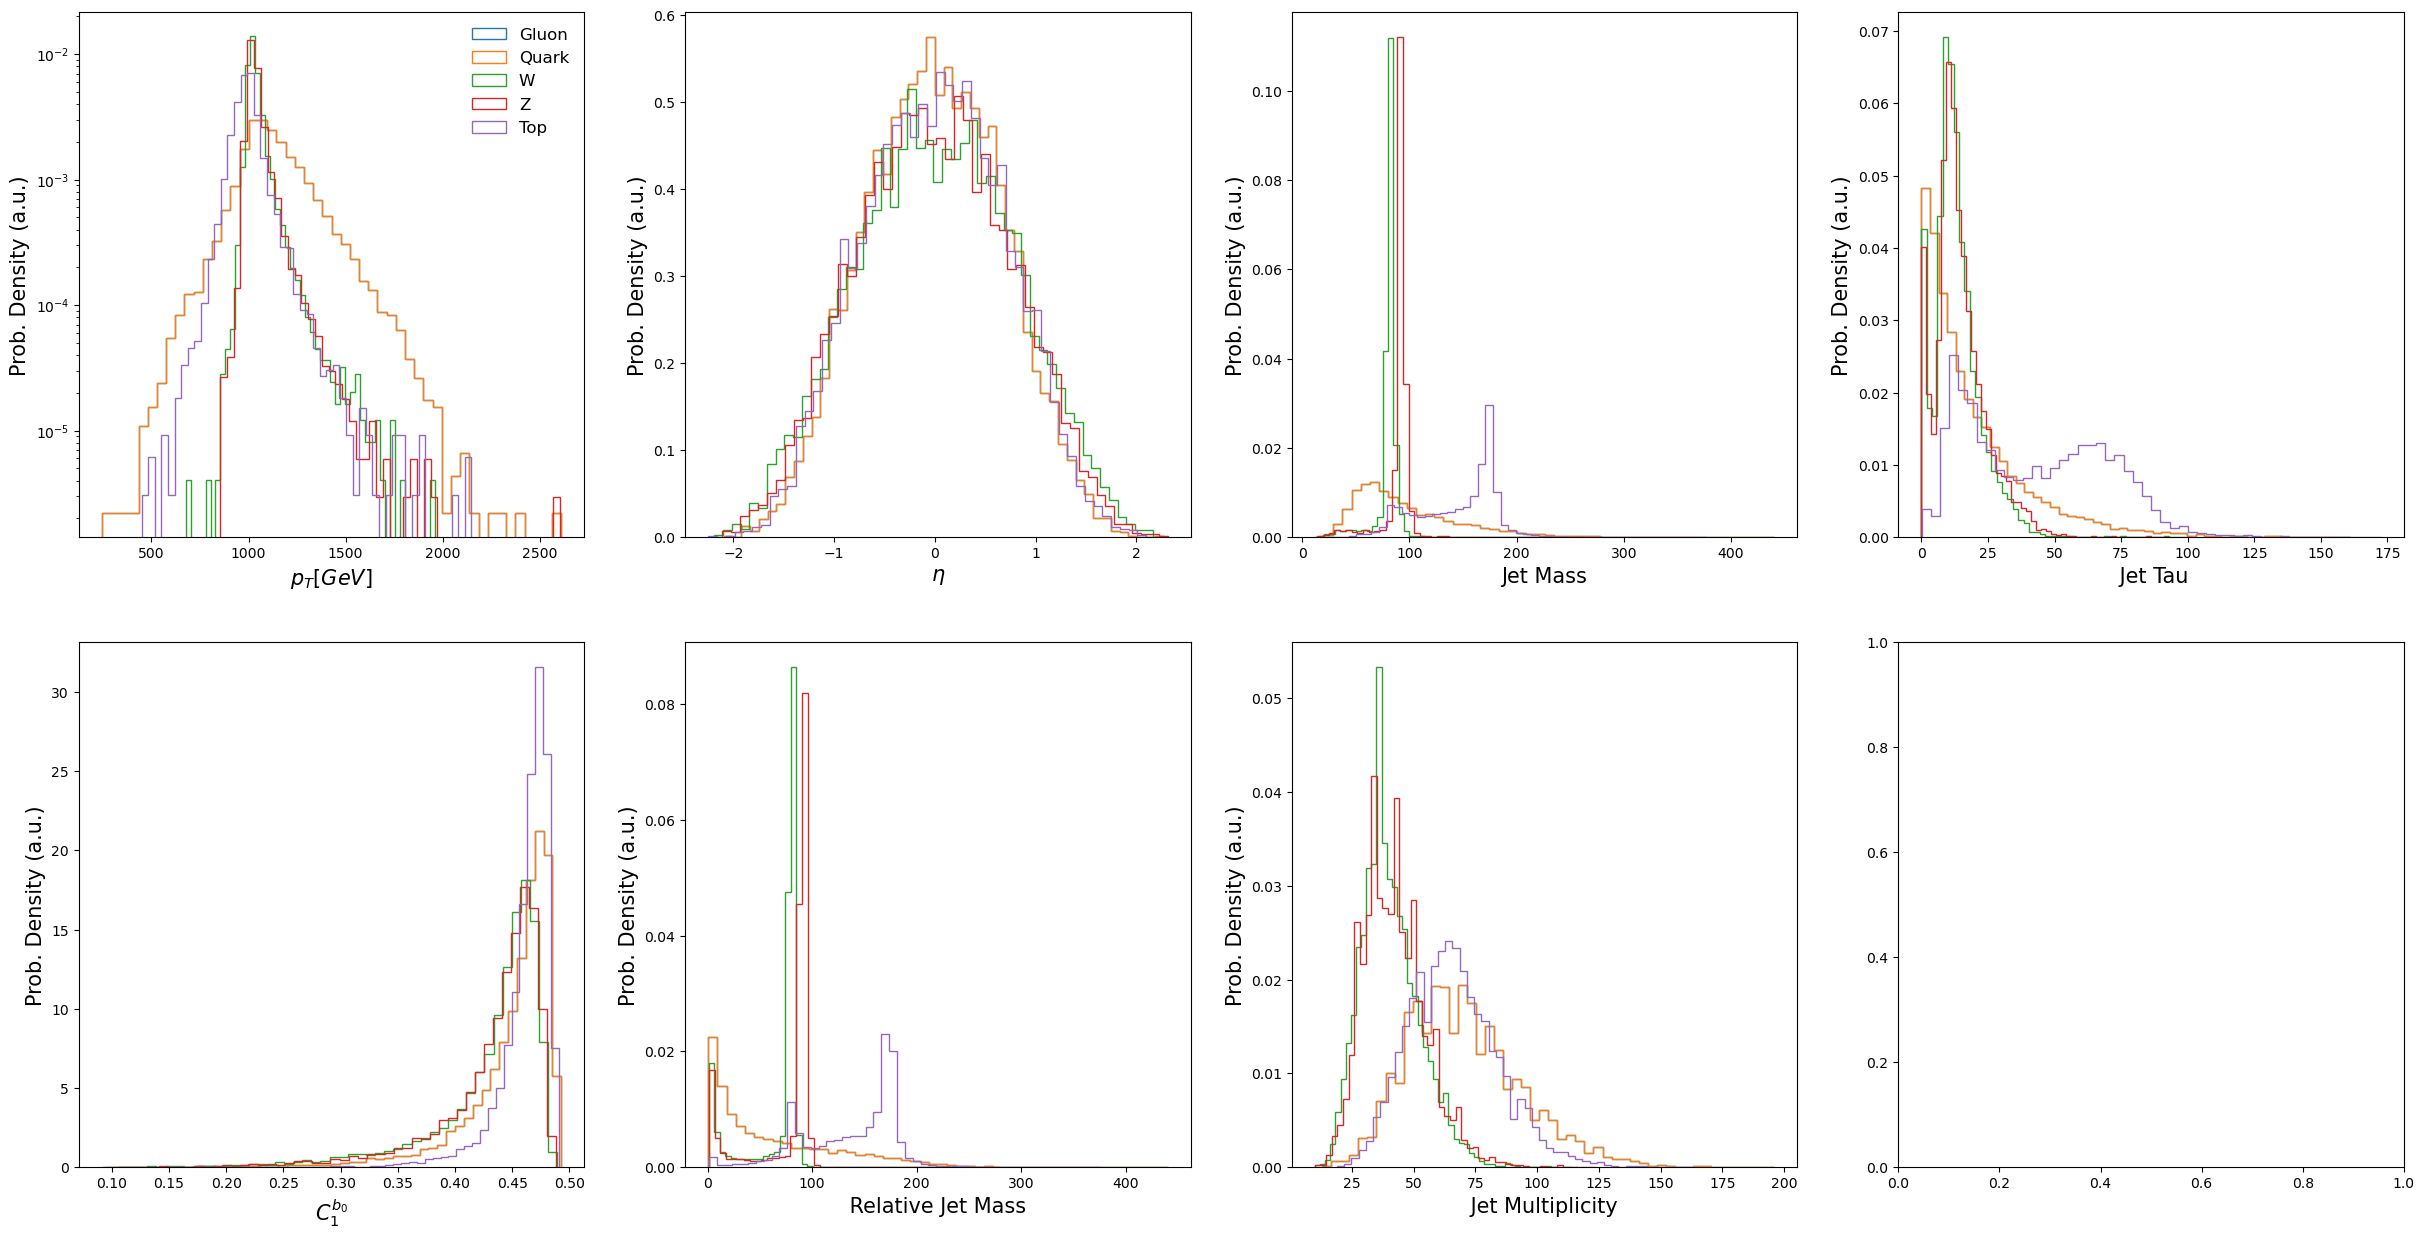

<Figure size 640x480 with 0 Axes>

In [14]:
# PLOTTING JET FEATURES 

fig,ax = plt.subplots(2,4,figsize=(30,15))

#1 b'j_pt' --> 
ax[0,0].hist(data_g[:,0],alpha=1.0,bins=50,density=True, histtype='step',fill=False,label="Gluon")
ax[0,0].hist(data_g[:,0],alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Quark")
ax[0,0].hist(data_W[:,0],alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="W")
ax[0,0].hist(data_Z[:,0],alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Z")
ax[0,0].hist(data_t[:,0],alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Top")
ax[0,0].set_xlabel("$p_{T} [GeV]$",fontsize=15)
ax[0,0].set_ylabel("Prob. Density (a.u.)",fontsize=15)
ax[0,0].set_yscale('log')
ax[0,0].legend(fontsize=12, frameon=False)

#2 b'j_eta'
ax[0,1].hist(data_g[:,1],alpha=1.0,bins=50,density=True, histtype='step',fill=False,label="Gluon")
ax[0,1].hist(data_g[:,1],alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Quark")
ax[0,1].hist(data_W[:,1],alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="W")
ax[0,1].hist(data_Z[:,1],alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Z")
ax[0,1].hist(data_t[:,1],alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Top")
ax[0,1].set_xlabel("$\eta $",fontsize=15)
ax[0,1].set_ylabel("Prob. Density (a.u.)",fontsize=15)

#3 b'j_mass'
ax[0,2].hist(data_g[:,2],alpha=1.0,bins=50,density=True, histtype='step',fill=False,label="Gluon")
ax[0,2].hist(data_g[:,2],alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Quark")
ax[0,2].hist(data_W[:,2],alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="W")
ax[0,2].hist(data_Z[:,2],alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Z")
ax[0,2].hist(data_t[:,2],alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Top")
ax[0,2].set_xlabel("Jet Mass",fontsize=15)
ax[0,2].set_ylabel("Prob. Density (a.u.)",fontsize=15)

#27 b'j_tau1_b1'
ax[0,3].hist(data_g[:,3],alpha=1.0,bins=50,density=True, histtype='step',fill=False,label="Gluon")
ax[0,3].hist(data_g[:,3],alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Quark")
ax[0,3].hist(data_W[:,3],alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="W")
ax[0,3].hist(data_Z[:,3],alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Z")
ax[0,3].hist(data_t[:,3],alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Top")
ax[0,3].set_xlabel(" Jet Tau",fontsize=15)
ax[0,3].set_ylabel("Prob. Density (a.u.)",fontsize=15)

#34 b'j_c1_b0_mmdt'
ax[1,0].hist(data_g[:,4],alpha=1.0,bins=50,density=True, histtype='step',fill=False,label="Gluon")
ax[1,0].hist(data_g[:,4],alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Quark")
ax[1,0].hist(data_W[:,4],alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="W")
ax[1,0].hist(data_Z[:,4],alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Z")
ax[1,0].hist(data_t[:,4],alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Top")
ax[1,0].set_xlabel("$ C_{1}^{b_{0}} $",fontsize=15)
ax[1,0].set_ylabel("Prob. Density (a.u.)",fontsize=15)

#48 b'j_mass_mmdt'
ax[1,1].hist(data_g[:,5],alpha=1.0,bins=50,density=True, histtype='step',fill=False,label="Gluon")
ax[1,1].hist(data_g[:,5],alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Quark")
ax[1,1].hist(data_W[:,5],alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="W")
ax[1,1].hist(data_Z[:,5],alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Z")
ax[1,1].hist(data_t[:,5],alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Top")
ax[1,1].set_xlabel(" Relative Jet Mass ",fontsize=15)
ax[1,1].set_ylabel("Prob. Density (a.u.)",fontsize=15)

#-7 b'j_multiplicity'
ax[1,2].hist(data_g[:,6],alpha=1.0,bins=50,density=True, histtype='step',fill=False,label="Gluon")
ax[1,2].hist(data_g[:,6],alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Quark")
ax[1,2].hist(data_W[:,6],alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="W")
ax[1,2].hist(data_Z[:,6],alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Z")
ax[1,2].hist(data_t[:,6],alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Top")
ax[1,2].set_xlabel(" Jet Multiplicity ",fontsize=15)
ax[1,2].set_ylabel("Prob. Density (a.u.)",fontsize=15)
plt.savefig('jet_features_final1.png')

plt.show()
plt.savefig('jet_features_final2.png')

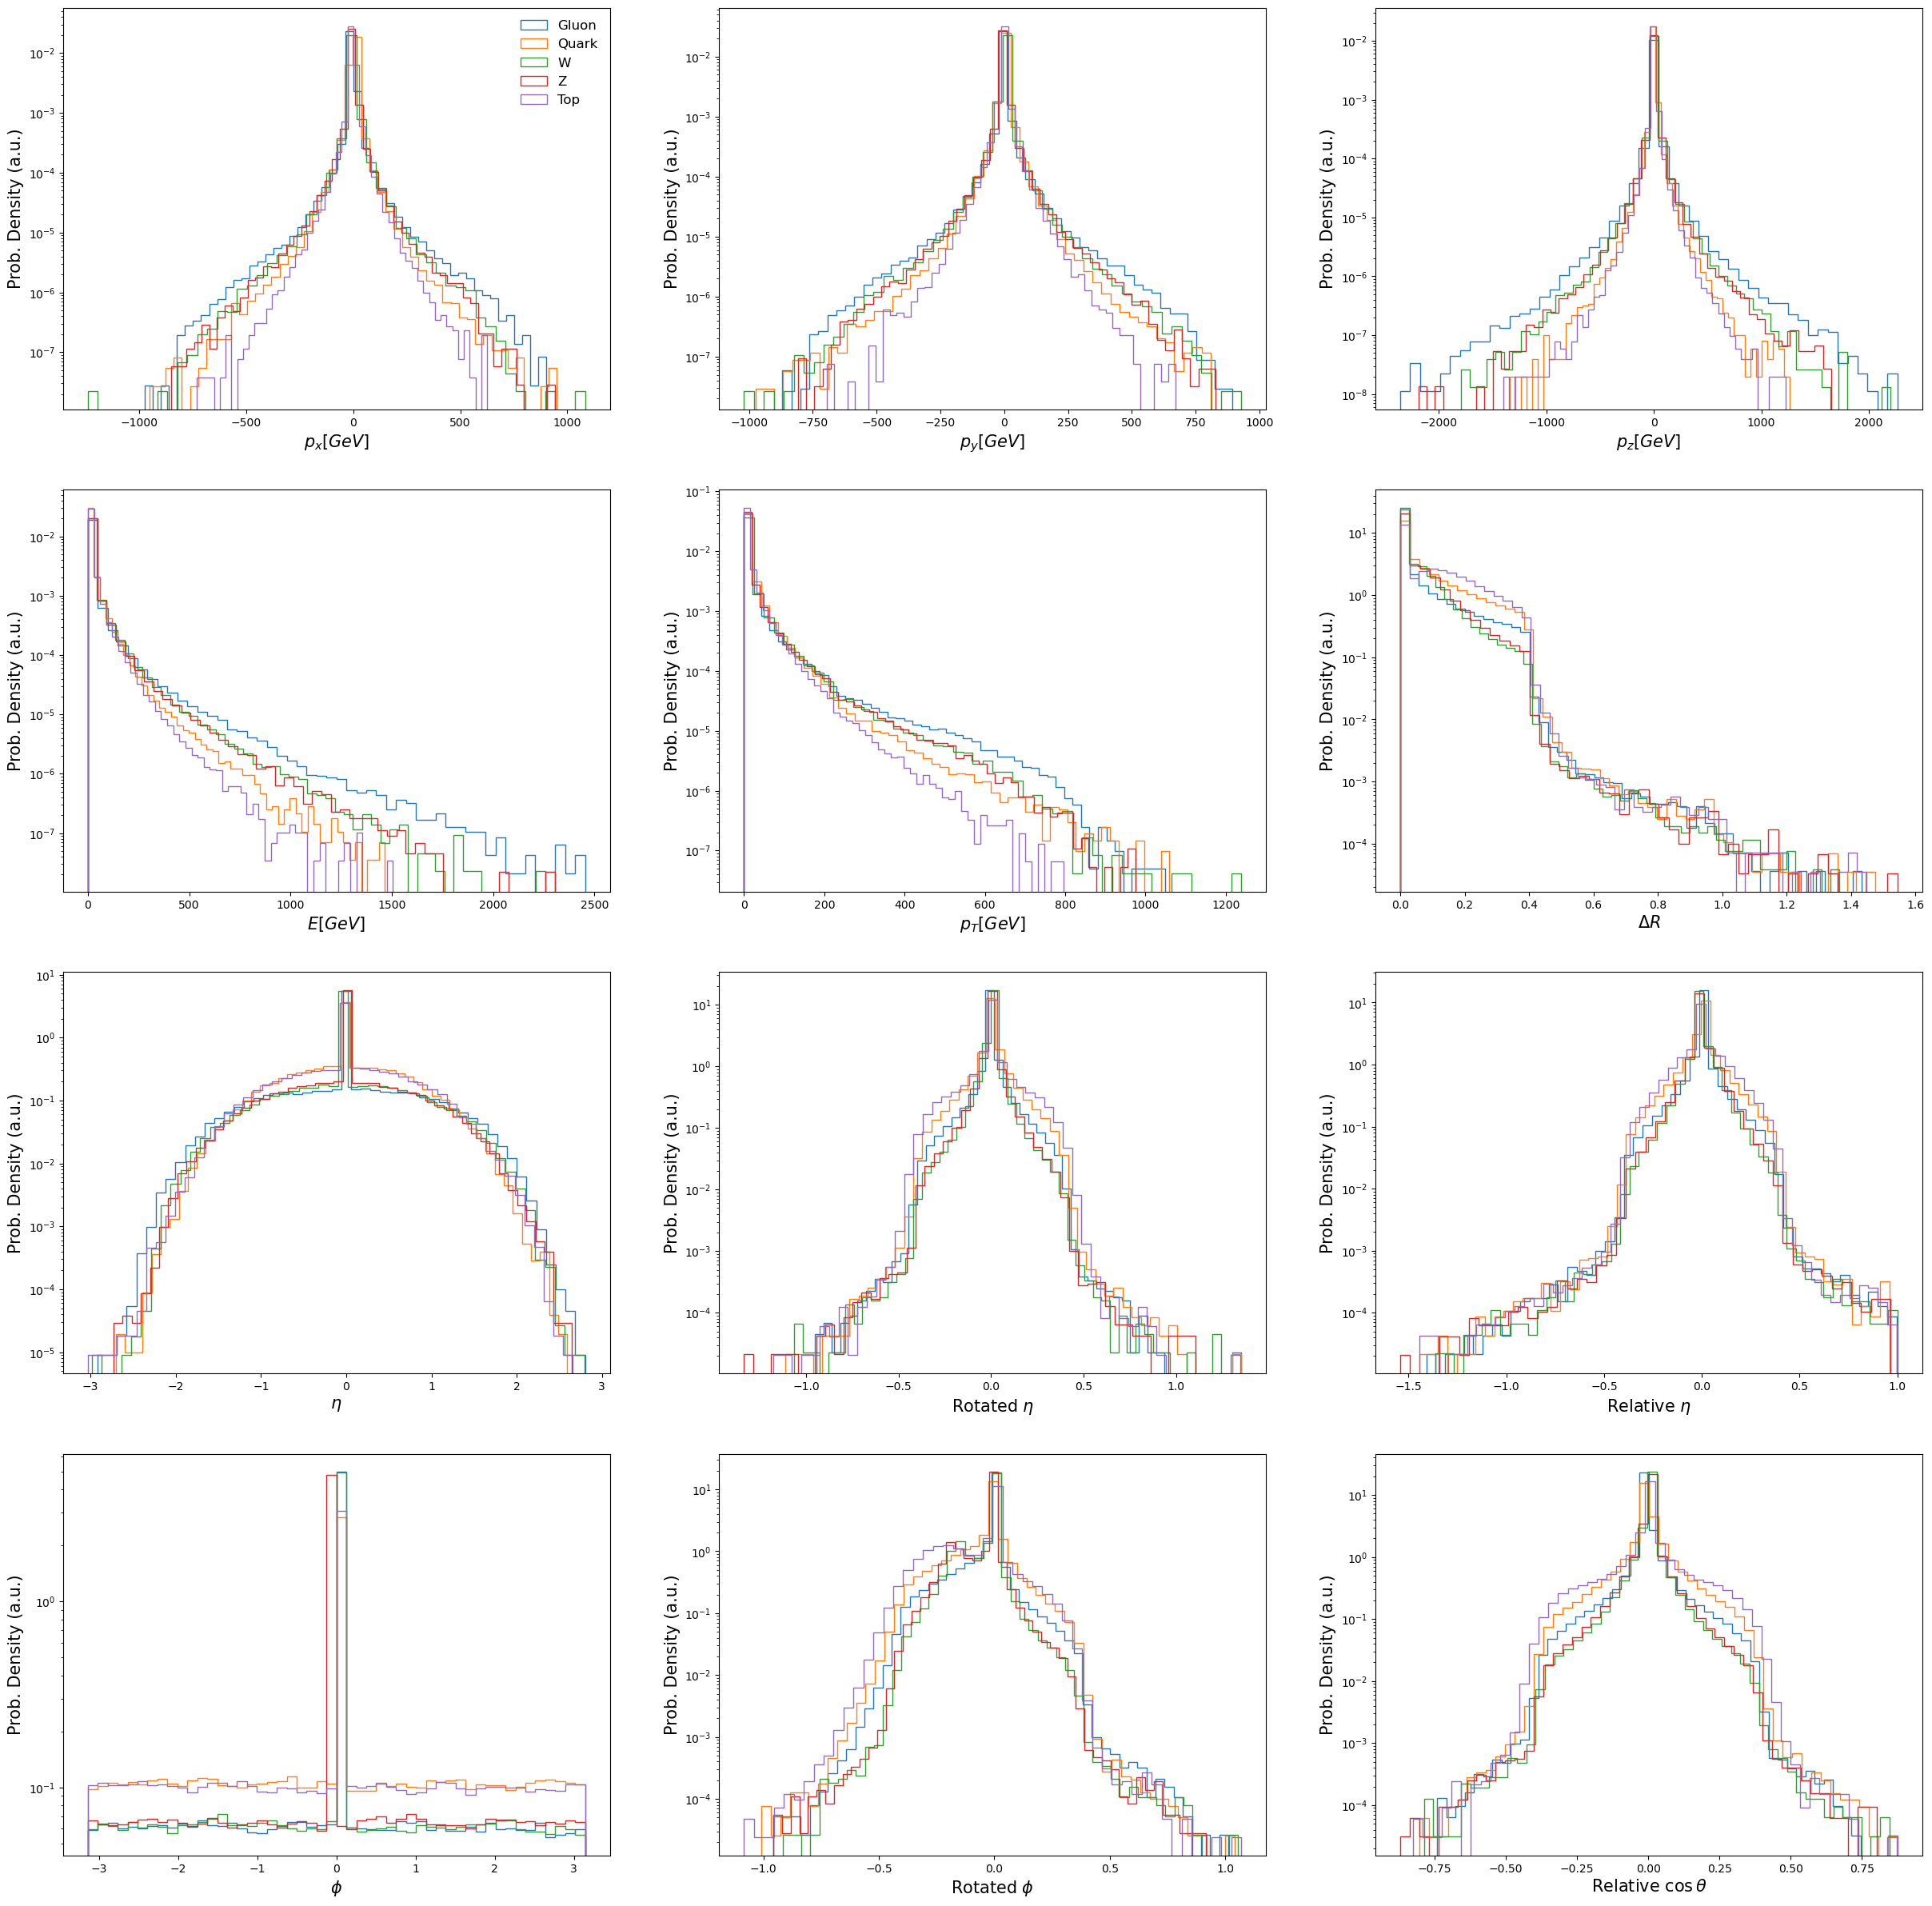

<Figure size 640x480 with 0 Axes>

In [12]:
# PLOTTING PARTICLE FEATURES 

np.ndarray.flatten(list_q[:,:,1])

particle_dataset = ['j1_px', 'j1_py', 'j1_pz', 'j1_e', 'j1_erel', 'j1_pt', 'j1_ptrel','j1_eta', 
                    'j1_etarel', 'j1_etarot', 'j1_phi', 'j1_phirel', 'j1_phirot', 
                    'j1_deltaR', 'j1_costheta', 'j1_costhetarel', 'j1_pdgid']

#0 - 'j1_px' -->
#1 - 'j1_py' -->
#2 - 'j1_pz' --> 
#3 - 'j1_e' --> 
#4 - 'j1_erel' --> 
#5 - 'j1_pt' --> 
#6 - 'j1_ptrel' --> 
#7 - 'j1_eta' --> 
#8 - 'j1_etarel' --> 
#9 - 'j1_etarot'  --> 
#10 - 'j1_phi' --> 
#11 - 'j1_phirel' --> 
#12 - 'j1_phirot' --> 
#13 - 'j1_deltaR' --> 
#14 - 'j1_costheta' --> 
#15 - 'j1_costhetarel' --> 
#16 - 'j1_pdgid' --> 

fig,ax = plt.subplots(4,3,figsize=(30,30))

#0 - 'j1_px' -->
ax[0,0].hist(np.ndarray.flatten(list_g[:,:,0]),alpha=1.0,bins=50,density=True, histtype='step',fill=False,label="Gluon")
ax[0,0].hist(np.ndarray.flatten(list_q[:,:,0]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Quark")
ax[0,0].hist(np.ndarray.flatten(list_W[:,:,0]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="W")
ax[0,0].hist(np.ndarray.flatten(list_Z[:,:,0]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Z")
ax[0,0].hist(np.ndarray.flatten(list_t[:,:,0]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Top")
ax[0,0].set_xlabel("$p_{x} [GeV]$",fontsize=15)
ax[0,0].set_ylabel("Prob. Density (a.u.)",fontsize=15)
ax[0,0].set_yscale('log')
ax[0,0].legend(fontsize=12, frameon=False)

#1 - 'j1_py' -->
ax[0,1].hist(np.ndarray.flatten(list_g[:,:,1]),alpha=1.0,bins=50,density=True, histtype='step',fill=False,label="Gluon")
ax[0,1].hist(np.ndarray.flatten(list_q[:,:,1]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Quark")
ax[0,1].hist(np.ndarray.flatten(list_W[:,:,1]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="W")
ax[0,1].hist(np.ndarray.flatten(list_Z[:,:,1]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Z")
ax[0,1].hist(np.ndarray.flatten(list_t[:,:,1]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Top")
ax[0,1].set_xlabel("$p_{y} [GeV]$",fontsize=15)
ax[0,1].set_ylabel("Prob. Density (a.u.)",fontsize=15)
ax[0,1].set_yscale('log')

#2 - 'j1_pz' --> 
ax[0,2].hist(np.ndarray.flatten(list_g[:,:,2]),alpha=1.0,bins=50,density=True, histtype='step',fill=False,label="Gluon")
ax[0,2].hist(np.ndarray.flatten(list_q[:,:,2]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Quark")
ax[0,2].hist(np.ndarray.flatten(list_W[:,:,2]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="W")
ax[0,2].hist(np.ndarray.flatten(list_Z[:,:,2]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Z")
ax[0,2].hist(np.ndarray.flatten(list_t[:,:,2]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Top")
ax[0,2].set_xlabel("$p_{z} [GeV]$",fontsize=15)
ax[0,2].set_ylabel("Prob. Density (a.u.)",fontsize=15)
ax[0,2].set_yscale('log')

#3 - 'j1_e' --> 
ax[1,0].hist(np.ndarray.flatten(list_g[:,:,3]),alpha=1.0,bins=50,density=True, histtype='step',fill=False,label="Gluon")
ax[1,0].hist(np.ndarray.flatten(list_q[:,:,3]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Quark")
ax[1,0].hist(np.ndarray.flatten(list_W[:,:,3]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="W")
ax[1,0].hist(np.ndarray.flatten(list_Z[:,:,3]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Z")
ax[1,0].hist(np.ndarray.flatten(list_t[:,:,3]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Top")
ax[1,0].set_xlabel("$E [GeV]$",fontsize=15)
ax[1,0].set_ylabel("Prob. Density (a.u.)",fontsize=15)
ax[1,0].set_yscale('log')

#5 - 'j1_pt' 
ax[1,1].hist(np.ndarray.flatten(list_g[:,:,5]),alpha=1.0,bins=50,density=True, histtype='step',fill=False,label="Gluon")
ax[1,1].hist(np.ndarray.flatten(list_q[:,:,5]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Quark")
ax[1,1].hist(np.ndarray.flatten(list_W[:,:,5]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="W")
ax[1,1].hist(np.ndarray.flatten(list_Z[:,:,5]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Z")
ax[1,1].hist(np.ndarray.flatten(list_t[:,:,5]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Top")
ax[1,1].set_xlabel("$p_{T} [GeV]$", fontsize=15)
ax[1,1].set_ylabel("Prob. Density (a.u.)",fontsize=15)
ax[1,1].set_yscale('log')

#13 - 'j1_deltaR'
ax[1,2].hist(np.ndarray.flatten(list_g[:,:,13]),alpha=1.0,bins=50,density=True, histtype='step',fill=False,label="Gluon")
ax[1,2].hist(np.ndarray.flatten(list_q[:,:,13]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Quark")
ax[1,2].hist(np.ndarray.flatten(list_W[:,:,13]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="W")
ax[1,2].hist(np.ndarray.flatten(list_Z[:,:,13]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Z")
ax[1,2].hist(np.ndarray.flatten(list_t[:,:,13]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Top")
ax[1,2].set_xlabel("$\Delta R $",fontsize=15)
ax[1,2].set_ylabel("Prob. Density (a.u.)",fontsize=15)
ax[1,2].set_yscale('log')

#7 - 'j1_eta' 
ax[2,0].hist(np.ndarray.flatten(list_g[:,:,7]),alpha=1.0,bins=50,density=True, histtype='step',fill=False,label="Gluon")
ax[2,0].hist(np.ndarray.flatten(list_q[:,:,7]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Quark")
ax[2,0].hist(np.ndarray.flatten(list_W[:,:,7]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="W")
ax[2,0].hist(np.ndarray.flatten(list_Z[:,:,7]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Z")
ax[2,0].hist(np.ndarray.flatten(list_t[:,:,7]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Top")
ax[2,0].set_xlabel("$\eta $",fontsize=15)
ax[2,0].set_ylabel("Prob. Density (a.u.)",fontsize=15)
ax[2,0].set_yscale('log')

#9 - 'j1_etarot'  
ax[2,1].hist(np.ndarray.flatten(list_g[:,:,9]),alpha=1.0,bins=50,density=True, histtype='step',fill=False,label="Gluon")
ax[2,1].hist(np.ndarray.flatten(list_q[:,:,9]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Quark")
ax[2,1].hist(np.ndarray.flatten(list_W[:,:,9]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="W")
ax[2,1].hist(np.ndarray.flatten(list_Z[:,:,9]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Z")
ax[2,1].hist(np.ndarray.flatten(list_t[:,:,9]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Top")
ax[2,1].set_xlabel("Rotated $\eta $",fontsize=15)
ax[2,1].set_ylabel("Prob. Density (a.u.)",fontsize=15)
ax[2,1].set_yscale('log')

#8 - 'j1_etarel'
ax[2,2].hist(np.ndarray.flatten(list_g[:,:,8]),alpha=1.0,bins=50,density=True, histtype='step',fill=False,label="Gluon")
ax[2,2].hist(np.ndarray.flatten(list_q[:,:,8]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Quark")
ax[2,2].hist(np.ndarray.flatten(list_W[:,:,8]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="W")
ax[2,2].hist(np.ndarray.flatten(list_Z[:,:,8]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Z")
ax[2,2].hist(np.ndarray.flatten(list_t[:,:,8]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Top")
ax[2,2].set_xlabel("Relative $\eta$",fontsize=15)
ax[2,2].set_ylabel("Prob. Density (a.u.)",fontsize=15)
ax[2,2].set_yscale('log')

#10 - 'j1_phi' 
ax[3,0].hist(np.ndarray.flatten(list_g[:,:,10]),alpha=1.0,bins=50,density=True, histtype='step',fill=False,label="Gluon")
ax[3,0].hist(np.ndarray.flatten(list_q[:,:,10]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Quark")
ax[3,0].hist(np.ndarray.flatten(list_W[:,:,10]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="W")
ax[3,0].hist(np.ndarray.flatten(list_Z[:,:,10]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Z")
ax[3,0].hist(np.ndarray.flatten(list_t[:,:,10]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Top")
ax[3,0].set_xlabel("$\phi$",fontsize=15)
ax[3,0].set_ylabel("Prob. Density (a.u.)",fontsize=15)
ax[3,0].set_yscale('log')

#12 - 'j1_phirot' 
ax[3,1].hist(np.ndarray.flatten(list_g[:,:,12]),alpha=1.0,bins=50,density=True, histtype='step',fill=False,label="Gluon")
ax[3,1].hist(np.ndarray.flatten(list_q[:,:,12]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Quark")
ax[3,1].hist(np.ndarray.flatten(list_W[:,:,12]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="W")
ax[3,1].hist(np.ndarray.flatten(list_Z[:,:,12]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Z")
ax[3,1].hist(np.ndarray.flatten(list_t[:,:,12]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Top")
ax[3,1].set_xlabel("Rotated $\phi $",fontsize=15)
ax[3,1].set_ylabel("Prob. Density (a.u.)",fontsize=15)
ax[3,1].set_yscale('log')

#15 - 'j1_costhetarel'
ax[3,2].hist(np.ndarray.flatten(list_g[:,:,15]),alpha=1.0,bins=50,density=True, histtype='step',fill=False,label="Gluon")
ax[3,2].hist(np.ndarray.flatten(list_q[:,:,15]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Quark")
ax[3,2].hist(np.ndarray.flatten(list_W[:,:,15]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="W")
ax[3,2].hist(np.ndarray.flatten(list_Z[:,:,15]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Z")
ax[3,2].hist(np.ndarray.flatten(list_t[:,:,15]),alpha=1.0,bins=50,density=True,histtype='step',fill=False,label="Top")
ax[3,2].set_xlabel(r"Relative $\cos{\theta} $",fontsize=15)
ax[3,2].set_ylabel("Prob. Density (a.u.)",fontsize=15)
ax[3,2].set_yscale('log')


plt.show()
plt.savefig('particle_features.png')